In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("nuovo_dataset_totale.csv")

In [5]:
df.head()

,Unnamed: 0,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]


In [12]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score


# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Assuming your dataframe is called df

# Define range of k values for LOF
k_values = [5, 10, 15, 20, 25]

best_k = None
best_silhouette = -1

for k in k_values:
    # Create LOF model
    lof = LocalOutlierFactor(n_neighbors=k)

    # Print the current value of k being tested
    print("Testing with k =", k)

    # Fit model and predict labels
    labels = lof.fit_predict(numeric_df)

    # Calculate silhouette score
    silhouette = silhouette_score(numeric_df, labels)

    # Update best k and silhouette score if needed
    if silhouette > best_silhouette:
        best_k = k
        best_silhouette = silhouette

print("Best k:", best_k)
print("Best silhouette score:", best_silhouette)


Testing with k = 5
Testing with k = 10
Testing with k = 15
Testing with k = 20
Testing with k = 25
Best k: 10
Best silhouette score: 0.0009377076749687332


In [14]:
clf = LocalOutlierFactor(n_neighbors=10) # , novelty=True
y_pred = clf.fit_predict(numeric_df)
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  2990, 106159], dtype=int64))

In [15]:
clf.negative_outlier_factor_

array([-2.38372683, -1.14745057, -1.07483255, ..., -1.00050198,
       -1.04282039, -1.04390228])

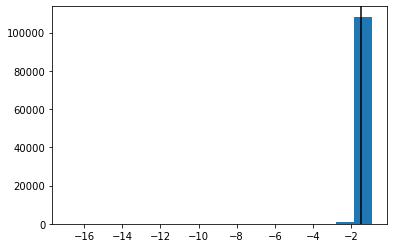

In [28]:
plt.hist(clf.negative_outlier_factor_, bins=17)
plt.axvline(np.min(clf.negative_outlier_factor_[np.where(y_pred==1)]), c='k')
plt.show()

In [57]:

# Assuming your dataframe is called df
# Assuming y_pred contains the outlier scores

# Extract "loudness" and "n_bars" columns
loudness = df["loudness"]
n_bars = df["n_bars"]

# Calculate the radius based on the outlier scores
# For example, you can use the negative outlier factor as the outlier score
outlier_scores = -clf.negative_outlier_factor_  # Assuming clf is your LOF model
radius = np.sqrt(outlier_scores)  # Use square root to scale the radius

# Create 2D scatter plot with circles
plt.scatter(n_bars, loudness, c='b', marker='o', label='Data Points')
for i in range(len(n_bars)):
    plt.gca().add_artist(plt.Circle((n_bars.iloc[i], loudness.iloc[i]), radius[i], color='r', fill=False))

plt.xlabel("n_bars")
plt.ylabel("loudness")
plt.legend()
plt.show()


In [37]:
numeric_columns

,Unnamed: 0,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars
0,0,1.0,290.48,52.0,5.0,13.0,0.53,0.52,0.0,-9.85,...,0.54,0.09,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0
1,1,1.0,539.23,45.0,5.0,8.0,0.75,0.34,5.0,-12.76,...,0.65,0.11,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0
2,2,1.0,264.20,39.0,5.0,10.0,0.80,0.64,7.0,-10.68,...,0.47,0.07,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0
3,3,1.0,387.41,0.0,6.0,7.0,0.68,0.54,6.0,-11.98,...,0.72,0.11,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0
4,4,1.0,248.96,0.0,1.0,13.0,0.76,0.67,11.0,-13.35,...,0.92,0.12,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,109542,1.0,209.66,23.0,2.0,2.0,0.47,0.98,5.0,-2.67,...,0.32,0.36,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0
109145,109543,1.0,205.72,56.0,1.0,1.0,0.67,0.72,9.0,-4.48,...,0.00,0.08,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0
109146,109544,1.0,195.85,80.0,3.0,28.0,0.81,0.63,11.0,-5.02,...,0.00,0.13,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0
109147,109545,1.0,208.70,60.0,1.0,1.0,0.65,0.78,0.0,-3.13,...,0.00,0.04,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0
